# importing all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reading the dataset

In [2]:
df=pd.read_csv('multiclass.csv')

In [3]:
df

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204,2
436,3,39228,1431,764,4510,93,2346,2
437,3,14531,15488,30243,437,14841,1867,2
438,3,10290,1981,2232,1038,168,2125,3


In [4]:
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [5]:
# display rows and columns
df.shape

(440, 8)

# summary of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class             440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


As there are no categorical columns, therefore no encoding will be needed

# Missing value check

In [7]:
df.isnull().sum()

Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64

# visualizing the target variable

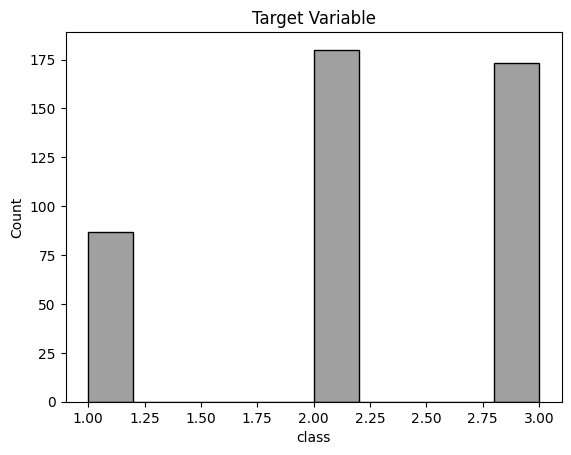

In [8]:
sns.histplot(x='class', data=df, color='grey')
plt.title('Target Variable')
plt.show()

In [9]:
df['class'].value_counts()   # class is the feature of this data set

class
2    180
3    173
1     87
Name: count, dtype: int64

# Dividing the dataset into features and target attributes

In [10]:
x=df.drop('class',axis=1)

In [11]:
x.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [12]:
y=df['class']

In [13]:
y.head()

0    2
1    2
2    2
3    1
4    1
Name: class, dtype: int64

# Splitting the dataset into train, validation and test data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # why we use random state

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)

In [17]:
x_train.shape,y_train.shape

((281, 7), (281,))

In [18]:
x_val.shape,y_val.shape

((71, 7), (71,))

In [19]:
x_test.shape,y_test.shape

((88, 7), (88,))

In [20]:
y_train.value_counts()

class
2    115
3    110
1     56
Name: count, dtype: int64

 # Balancing the imbalanced dataset

In [21]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()

x_sm, y_sm = smt.fit_resample(x_train, y_train)

In [22]:
x_sm

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,2427,7097,10391,1127,4314,1468
1,2,9790,1786,5109,3570,182,1043
2,2,9155,1897,5167,2714,228,1113
3,3,3097,4230,16483,575,241,2080
4,3,514,7677,19805,937,9836,716
...,...,...,...,...,...,...,...
340,1,1976,5079,1608,1055,154,1485
341,1,566,707,2197,445,876,45
342,1,8699,2563,2342,7260,678,581
343,3,2653,2771,2336,894,134,1799


In [23]:
y_sm

0      2
1      3
2      3
3      2
4      2
      ..
340    3
341    3
342    3
343    3
344    3
Name: class, Length: 345, dtype: int64

In [24]:
y_sm.value_counts()

class
2    115
3    115
1    115
Name: count, dtype: int64

# scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
x_sm = scaler.fit_transform(x_sm)

In [28]:
x_sm

array([[-1.65677754, -0.92274877,  0.24946063, ..., -0.39873226,
         0.32787811, -0.00340177],
       [-0.45596188, -0.24411882, -0.45548412, ...,  0.11790372,
        -0.50466411, -0.1461562 ],
       [-0.45596188, -0.30264523, -0.44075076, ..., -0.06311978,
        -0.49539574, -0.12264371],
       ...,
       [-1.65677754, -0.34467365, -0.35235061, ...,  0.89825032,
        -0.40472681, -0.30133867],
       [ 0.74485377, -0.9019189 , -0.32474215, ..., -0.44800618,
        -0.51433547,  0.10777875],
       [ 0.74485377, -0.39997421, -0.38832124, ...,  1.70122486,
        -0.42205465, -0.30906421]])

In [29]:
x_val = scaler.transform(x_val)

In [30]:
x_val[:10]

array([[ 0.74485377, -1.12800599,  2.74019462,  1.21561227, -0.49939486,
         1.22630641,  1.60283757],
       [ 0.74485377, -0.37665581, -0.31823824, -0.61899215, -0.47232592,
        -0.40915951, -0.44812383],
       [-1.65677754, -0.68182269, -0.54454793, -0.46418533,  0.94815867,
        -0.48975411, -0.37053259],
       [-0.45596188,  0.91083324, -0.26567598, -0.60373928, -0.17012665,
        -0.50547006,  0.37750066],
       [-1.65677754, -0.93039868,  0.72477736, -0.36791392, -0.33275173,
        -0.2258068 , -0.33190492],
       [ 0.74485377, -0.92099759,  0.2710961 , -0.35157154,  0.60429862,
        -0.3825633 ,  0.54309581],
       [ 0.74485377, -0.95049122, -0.25598648, -0.42209135, -0.31245003,
        -0.49398533,  0.96967966],
       [ 0.74485377, -0.93049085,  0.34874489,  0.4289995 , -0.62606901,
         0.3041027 ,  0.07351768],
       [-1.65677754, -0.12595997,  0.10239251, -0.19092109,  1.1226264 ,
        -0.34891505,  0.22131051],
       [-0.45596188, -0.0588

In [31]:
x_test = scaler.transform(x_test)

In [32]:
x_test[:10]

array([[-1.65677754, -0.60182123,  2.43026316,  0.60975602,  1.51047347,
        -0.37410086,  0.72481381],
       [ 0.74485377, -0.15416325, -0.53658395, -0.54233158, -0.19381197,
        -0.48068722, -0.44039829],
       [ 0.74485377,  1.37710907,  0.2610084 ,  0.47228202, -0.04302955,
         0.38973446, -0.15320995],
       [-1.65677754,  1.76734664, -0.62763876, -0.59898513,  0.04853958,
        -0.51896966, -0.28991832],
       [-0.45596188, -1.09648468, -0.57321825, -0.58224658, -0.54951468,
        -0.52360385, -0.32115635],
       [ 0.74485377, -0.59140629, -0.24735883, -0.42407224, -0.10689532,
        -0.49861952, -0.26606993],
       [ 0.74485377, -1.11630071, -0.57069632, -0.28055652, -0.62141653,
        -0.47403817, -0.49279757],
       [ 0.74485377, -0.19139895,  0.5328455 ,  0.34332586, -0.48120792,
         0.1713231 ,  0.29016854],
       [ 0.74485377, -0.19803502, -0.42960119, -0.52598921, -0.41755363,
        -0.50748493,  0.2172798 ],
       [ 0.74485377, -0.5119

 # Modeling

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
# Randomly chosing the value of k

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_sm, y_sm)

KNeighborsClassifier(metric='euclidean')

In [35]:
# knn score metric uses the same score metric calculated in Classification problem

round(knn.score(x_val, y_val)*100,2)

91.55

# Hyperprameter Tunning

In [36]:
Score_list = []
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(x_sm, y_sm)
    scr = knn.score(x_val, y_val)
    Score_list.append(scr)

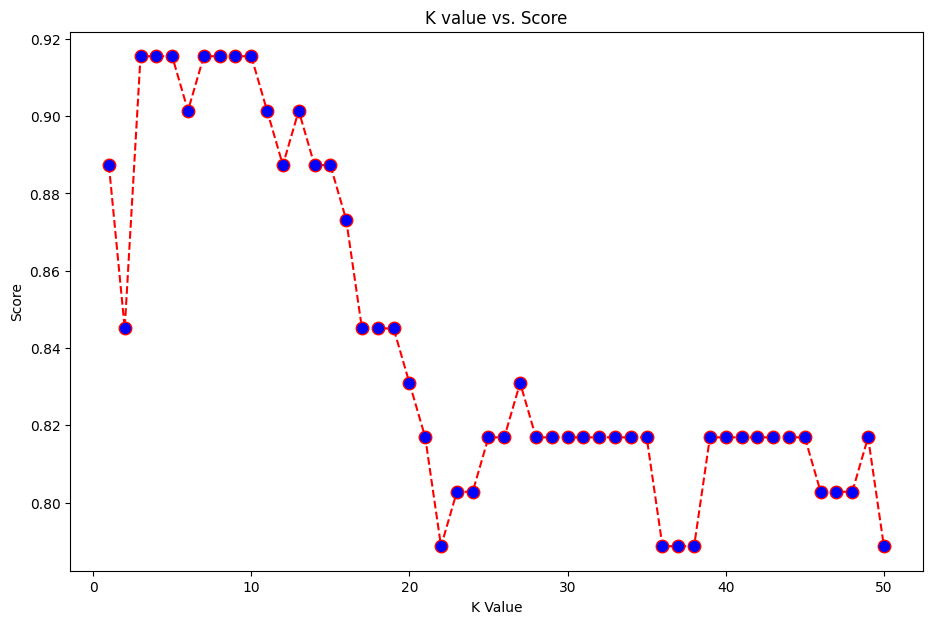

In [37]:
plt.figure(figsize=(11,7))
plt.plot(range(1,51), Score_list, color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=9)
plt.title('K value vs. Score')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.show()

# From the above plot it can be seen that k=7 gives better accuracy, therefore retraining the model using this value



In [38]:
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(x_sm, y_sm)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [41]:
score = round(knn.score(x_val, y_val)*100,2)
score

91.55

Accuracy increases with k=7

Taking predictions on unseen data

In [45]:
y_pred = knn.predict(x_test)

In [46]:
print("Actual values:", y_test)

Actual values: 265    2
78     3
347    2
255    2
327    3
      ..
57     2
137    2
24     2
17     3
66     3
Name: class, Length: 88, dtype: int64


In [47]:
print("Predicted values:", y_pred)

Predicted values: [2 3 2 1 3 3 3 2 3 3 1 1 2 3 2 3 1 2 1 3 2 2 2 3 1 1 1 1 3 3 2 2 1 2 1 3 3
 2 2 1 3 3 3 3 2 1 2 2 2 1 2 3 3 1 2 3 1 3 2 2 1 3 2 2 2 2 2 2 3 1 2 3 3 3
 3 2 2 1 2 3 3 3 1 2 3 2 3 3]


# Visualisation of Actual vs. Predicted

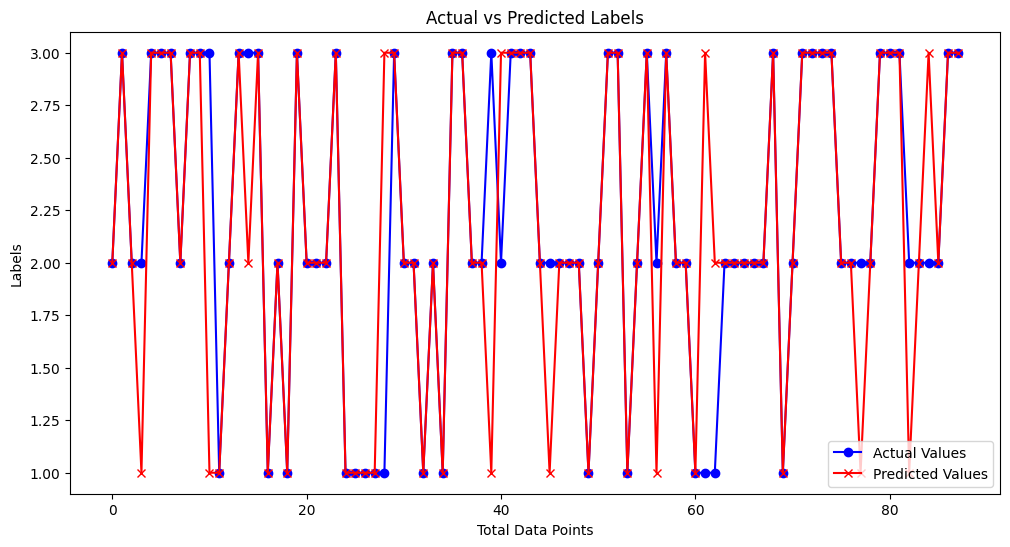

In [48]:
rows = np.arange(len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(rows, y_test, marker='o', color='b', label='Actual Values')
plt.plot(rows, y_pred, marker='x', color='r', label='Predicted Values')
plt.title('Actual vs Predicted Labels')
plt.xlabel('Total Data Points')
plt.ylabel('Labels')
plt.legend()
plt.show()